In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
period = 0.8  # Cardiac cycle period (s)
duration = 2.4  # Total simulation time (s)
dt = 0.01  # Time step (s)
P_WK_0 = 8.0  # Initial Windkessel pressure (mmHg)

# Windkessel parameters
Rc = 0.033/1000   # mmHg mL^{-1} s
Rp = 0.79         # mmHg mL^{-1} s
C = 0.875         # mL mmHg^-1

pressure_last_step = 0.0


mmHg = 1333.322  # mmHg to Pa conversion factor
def calculate_pressure(t, t_load=0.2, t_end_diastole=0.5, t_cycle=0.8,
                      diastole_pressure=8.0*mmHg, systole_pressure=110.0*mmHg, start_pressure=9.0*mmHg):
    local_t = t % t_cycle
    value = 0
    
    if local_t < t_load:
        value = diastole_pressure * local_t / t_load + start_pressure * (t_load - local_t) / t_load
    elif t_load <= local_t < t_end_diastole:
        value = diastole_pressure
    elif t_end_diastole <= local_t < (0.15 + t_end_diastole):    
        a = -(local_t - t_end_diastole)**2 / 0.004
        value = diastole_pressure + (systole_pressure-diastole_pressure) * (1.0 - np.exp(a))
    elif (0.15 + t_end_diastole) <= local_t < t_end_diastole+0.3:
        a = -(local_t - t_end_diastole - 0.3)**2 / 0.004
        value = diastole_pressure + (systole_pressure-diastole_pressure) * (1.0 - np.exp(a))
    elif t_end_diastole+0.3 <= local_t < t_cycle:
        value = diastole_pressure
    
    return value

def Windkessel_1(Q_AO, P_WK_0, dt, t, period):
    
    local_time = np.mod(t, period)  # 归一化时间
    global is_valve_open
    global pressure_last_step
    if local_time < 0.3:
        print(pressure_last_step)
        P_AO = calculate_pressure(
            t,t_load = 0.3,t_end_diastole = 0.3,t_cycle = period,
            diastole_pressure = 8.0,
            systole_pressure = 8.0,
            start_pressure = pressure_last_step
        )
        P_WK = 8.0  # 舒张阶段，P_WK维持不变
        is_valve_open = False # 此阶段关闭瓣膜
    elif not is_valve_open:
        P_WK = 8.0
        P_AO = 8.0
        if Q_AO > 0:
            is_valve_open = True
    elif is_valve_open:
        P_WK = (C*P_WK_0/dt+Q_AO)/(1/Rp+C/dt)
        P_AO = P_WK + Rc*Q_AO
        pressure_last_step = P_AO # pressure_last_step 用于记录上一步的主动脉压力
    
    return P_AO, P_WK



0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529358
-31.191362108529272
-31.191362108529272
-31.191362108529272
-31.191362108529272
-31.191362108529272
-31.191362108529272
-31.191362108529272
-31.191362108529272
-31.191362108529272
-31.191362108529272
-31.191362108529272
-31.191362108529272
-31.191362108529272
-31.191362108529272


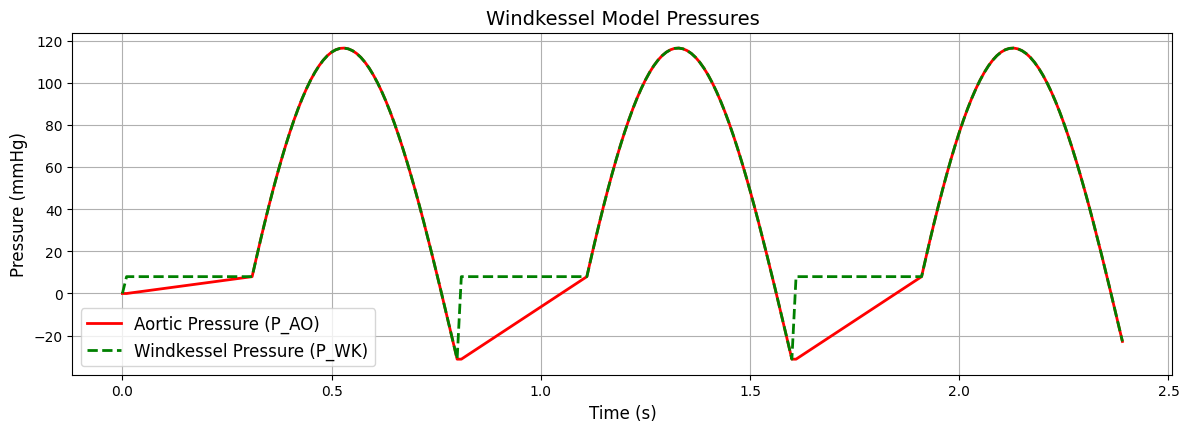

In [30]:
from matplotlib.gridspec import GridSpec



# Initialize variables
time_points = np.arange(0, duration, dt)
Q_AO = np.zeros_like(time_points)
P_AO = np.zeros_like(time_points)
P_WK = np.zeros_like(time_points)
is_valve_open = False
pressure_last_step = 0.0

# Create a sine wave for Q_AO (simulating cardiac output)
for i, t in enumerate(time_points):
    local_time = np.mod(t, period)
    Q_AO[i] = 800 * np.sin(np.pi * local_time*1.8)  # mL/s




# Run Windkessel model
for i, t in enumerate(time_points[0:-1]):
    # local_time = np.mod(t, period)
    P_AO[i+1], P_WK[i+1] = Windkessel_1(Q_AO[i], P_WK[i], dt, t, period)

# Plotting
plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1, height_ratios=[1, 1])

# Q_AO plot
# ax1 = plt.subplot(gs[0])
# ax1.plot(time_points, Q_AO, 'b-', linewidth=2)
# ax1.set_ylabel('Q_AO (mL/s)', fontsize=12)
# ax1.set_title('Aortic Flow (Q_AO) - Sine Wave', fontsize=14)
# ax1.grid(True)

# Pressure plot
ax2 = plt.subplot(gs[1])
ax2.plot(time_points, P_AO, 'r-', label='Aortic Pressure (P_AO)', linewidth=2)
ax2.plot(time_points, P_WK, 'g--', label='Windkessel Pressure (P_WK)', linewidth=2)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Pressure (mmHg)', fontsize=12)
ax2.set_title('Windkessel Model Pressures', fontsize=14)
ax2.legend(fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()